<h1>Homework</h1>

The objective is to create a regression model using machine learning. 

You can work with the data science salary or pick a new dataset from [Kaggle](https://www.kaggle.com/datasets?tags=14203-Regression) .

If you are selecting a new dataset be mindful of the "usability" score as it is an indication of how much work you will have to put on pre processing the data.

You can use the lecture notebooks as a guide but you are free to use any methods and tools you like.

Don't forget that understanding the data is part of the process.

And, above all, try to enjoy the process and be kind to yourself when you get stuck.

Importing the libraries for the data

In [79]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
# getting seaborn online to give our graphics a kick.
import seaborn as sns
sns.set()

Now load and clean up the data

In [81]:
# Load your data with the new file path
df = pd.read_csv('Datasets/parking_violations_issued.csv', sep=',', index_col=0, low_memory=False)
# Clean up data: Convert 'Registration State' to string and strip extra spaces
df['Registration State'] = df['Registration State'].str.strip()
df_cleaned = df[df['Registration State'] != '99']
df_cleaned = df_cleaned[df_cleaned['Violation Code'] != 0]
df = df_cleaned

# Convert 'Violation Code' to numeric, and handle any errors as NaN (then drop NaNs)
df['Violation Code'] = pd.to_numeric(df['Violation Code'], errors='coerce')
df = df.dropna(subset=['Violation Code'])  # Drop rows with NaN values in 'Violation Code'

Time to create groups of data to use for the charts

In [83]:
# Group the data by 'Registration State' and 'Violation Code' and count occurrences
violation_counts = df.groupby(['Registration State', 'Violation Code']).size().reset_index(name='Counts')

# Filter out states with zero violations (if any exist)
violation_counts = violation_counts[violation_counts['Counts'] > 0]

# Ensure that 'Violation Code' is treated as a categorical variable (string type)
violation_counts['Violation Code'] = violation_counts['Violation Code'].astype(str)

In [84]:
# Print violation_counts to check the data
print(violation_counts.head())

  Registration State Violation Code  Counts
0                 AB              9       1
1                 AB             13       3
2                 AB             14      30
3                 AB             16       9
4                 AB             17       2


Now the fun part, making the first graph, though this one is a rough second draft.

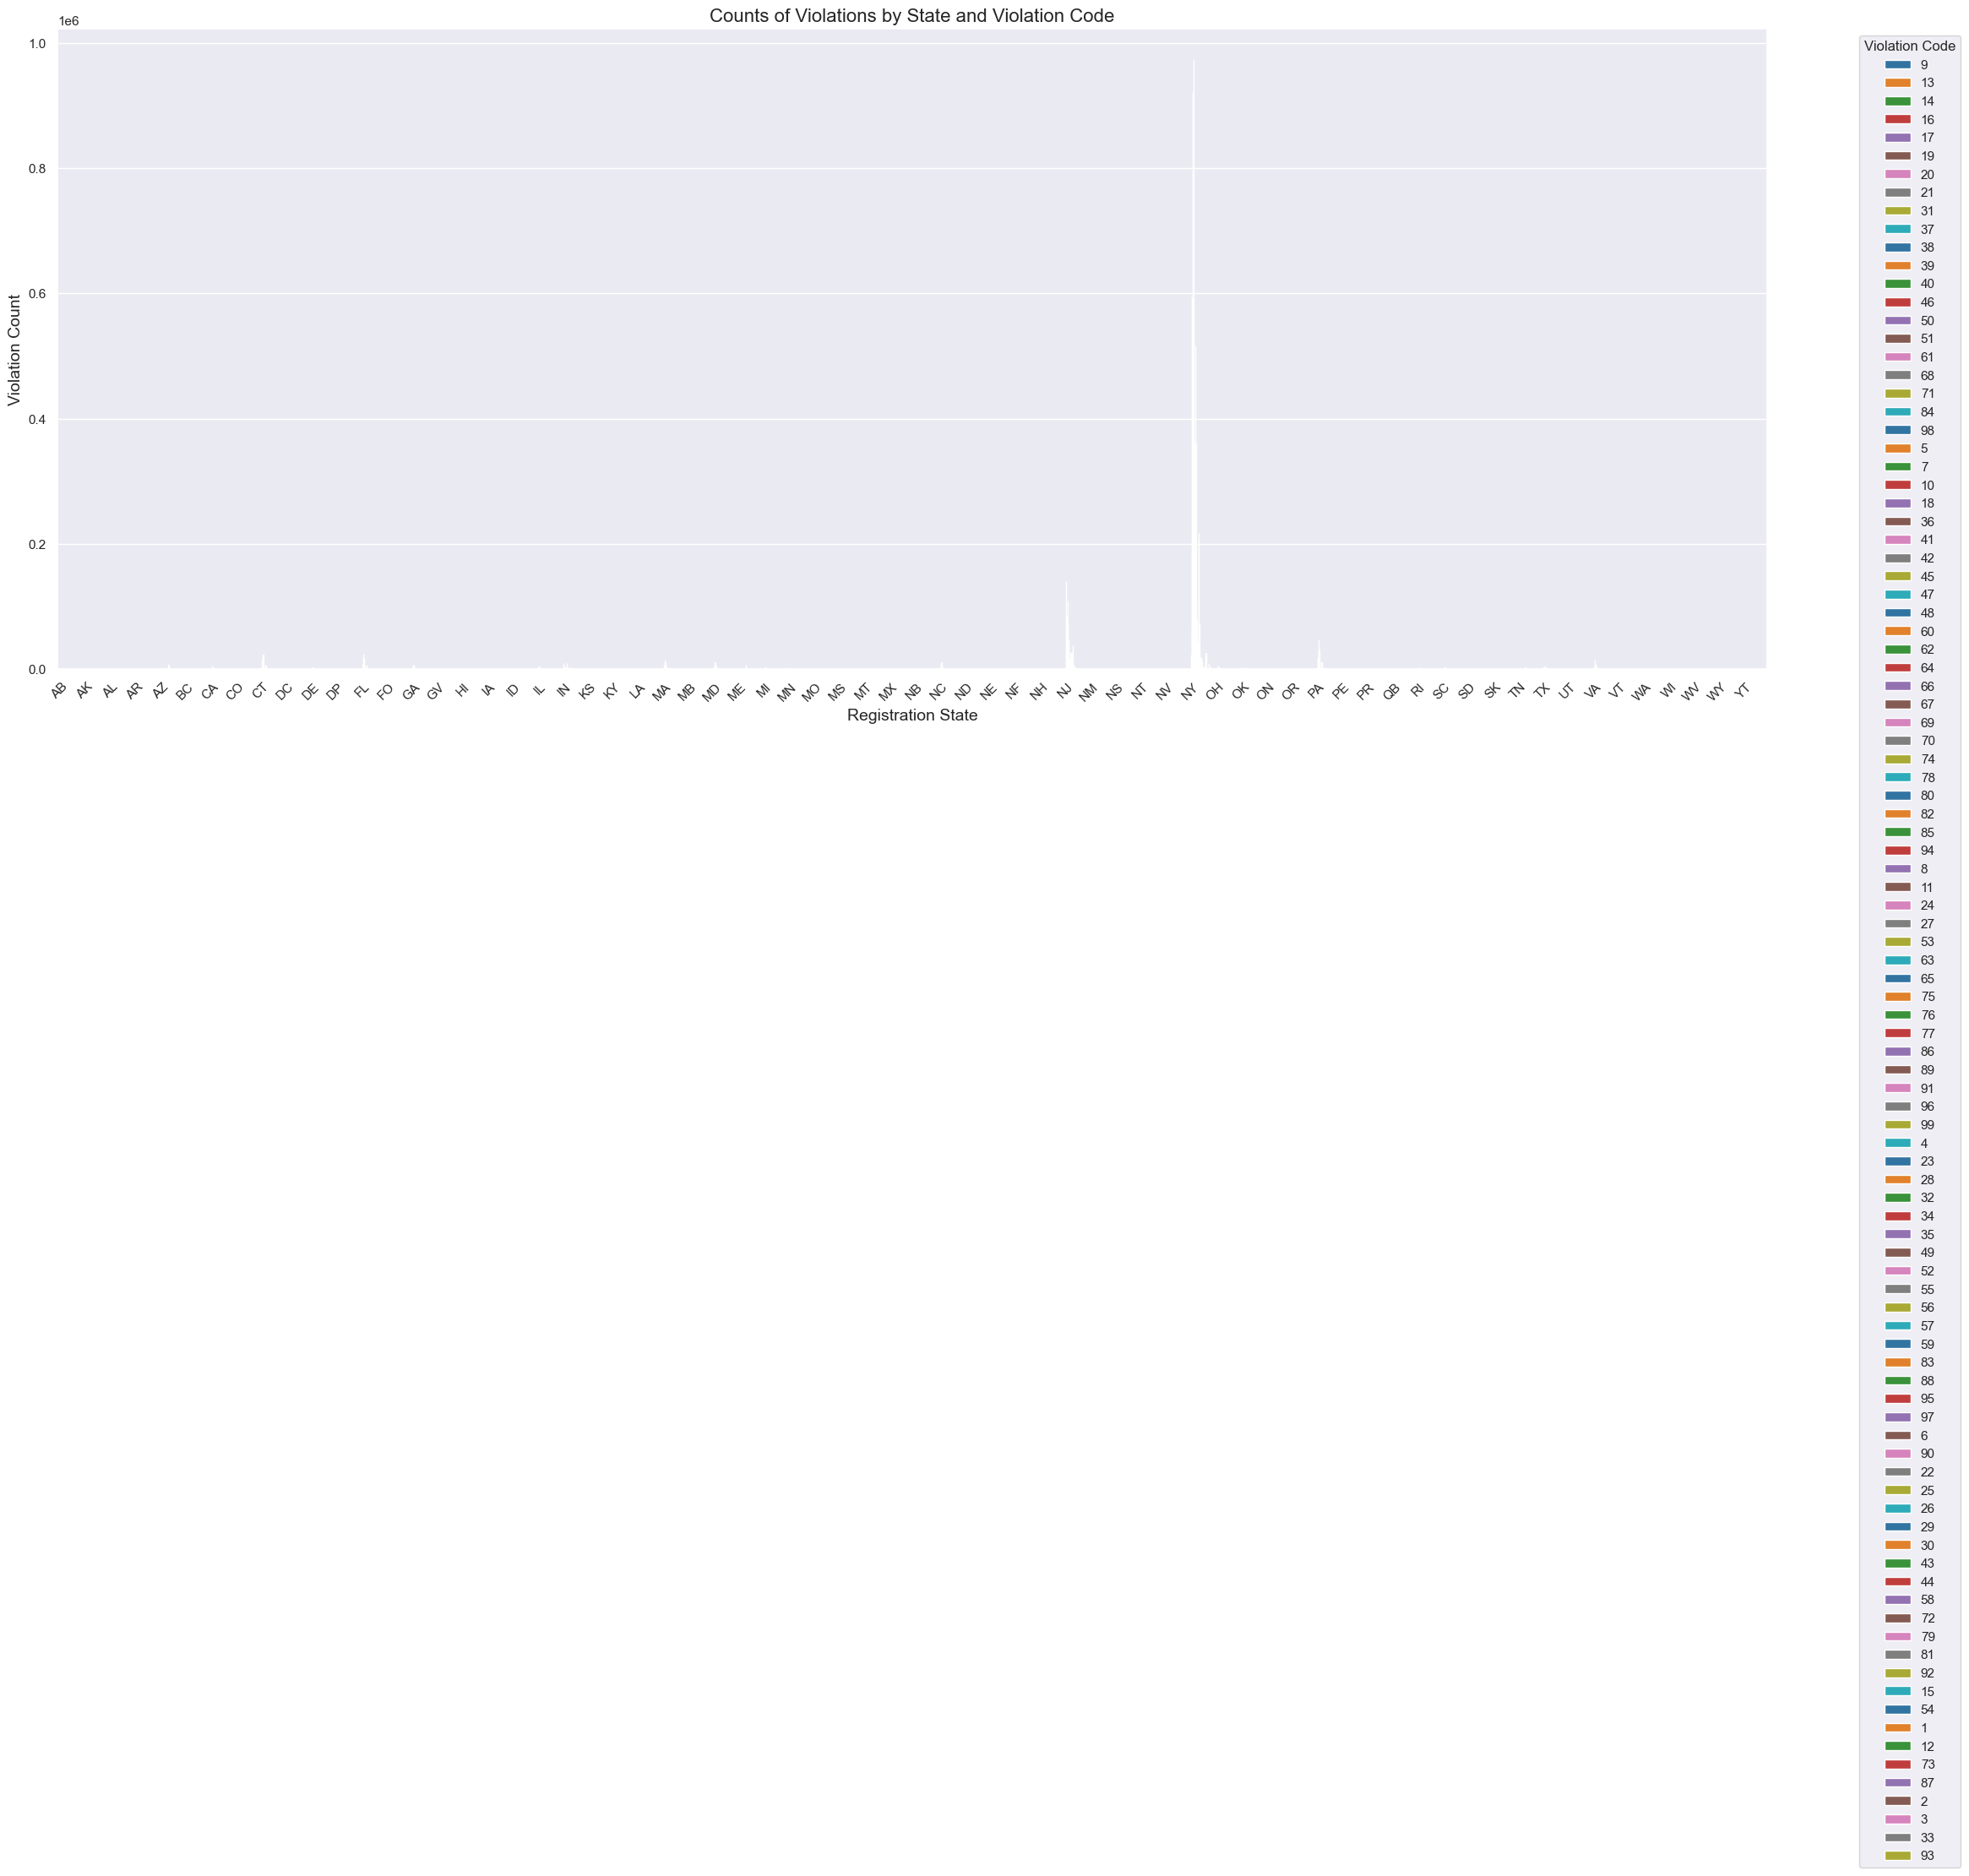

In [86]:
# Create the graph background
plt.figure(figsize=(24, 18))

# Create a custom color palette for the violation codes
violation_codes = violation_counts['Violation Code'].unique()  # Get unique violation codes
palette = sns.color_palette("tab10", n_colors=len(violation_codes))  # Using a different palette

# Create the barplot with 'Registration State' on the x-axis and 'Counts' on the y-axis, color-coded by 'Violation Code'
sns.barplot(
    x='Registration State',
    y='Counts',
    hue='Violation Code',
    data=violation_counts,
    palette=palette,
    hue_order=violation_codes  # Ensure the order matches the palette
)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and a title
plt.title('Counts of Violations by State and Violation Code', fontsize=16)
plt.xlabel('Registration State', fontsize=14)
plt.ylabel('Violation Count', fontsize=14)

# Move the legend outside the plot area to the right
plt.legend(title='Violation Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Manually adjust margins based on the scale of counts and to prevent clipping
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.2)

# Automatically adjust the padding between plot elements (if necessary)
plt.tight_layout(pad=3.0)  # Adjust layout to prevent clipping

# Show the plot
plt.show()

And a final check to see just how many violation codes there are, to make sure we got them all

In [88]:
print(violation_counts['Violation Code'].unique())

['9' '13' '14' '16' '17' '19' '20' '21' '31' '37' '38' '39' '40' '46' '50'
 '51' '61' '68' '71' '84' '98' '5' '7' '10' '18' '36' '41' '42' '45' '47'
 '48' '60' '62' '64' '66' '67' '69' '70' '74' '78' '80' '82' '85' '94' '8'
 '11' '24' '27' '53' '63' '65' '75' '76' '77' '86' '89' '91' '96' '99' '4'
 '23' '28' '32' '34' '35' '49' '52' '55' '56' '57' '59' '83' '88' '95'
 '97' '6' '90' '22' '25' '26' '29' '30' '43' '44' '58' '72' '79' '81' '92'
 '15' '54' '1' '12' '73' '87' '2' '3' '33' '93']


Third attempt at making appropriate graphics for informative purposes:

In [90]:
# Load and prepare the data
df['Registration State'] = df['Registration State'].str.strip()
df['Violation Code'] = pd.to_numeric(df['Violation Code'], errors='coerce')
df = df.dropna(subset=['Violation Code'])

# Group the data by 'Registration State' and 'Violation Code', and count the occurrences
violation_counts = df.groupby(['Registration State', 'Violation Code']).size().reset_index(name='Counts')
violation_counts['Violation Code'] = violation_counts['Violation Code'].astype(str)

After reprocessing the data for the new output requirements, we can now make our bar chart:

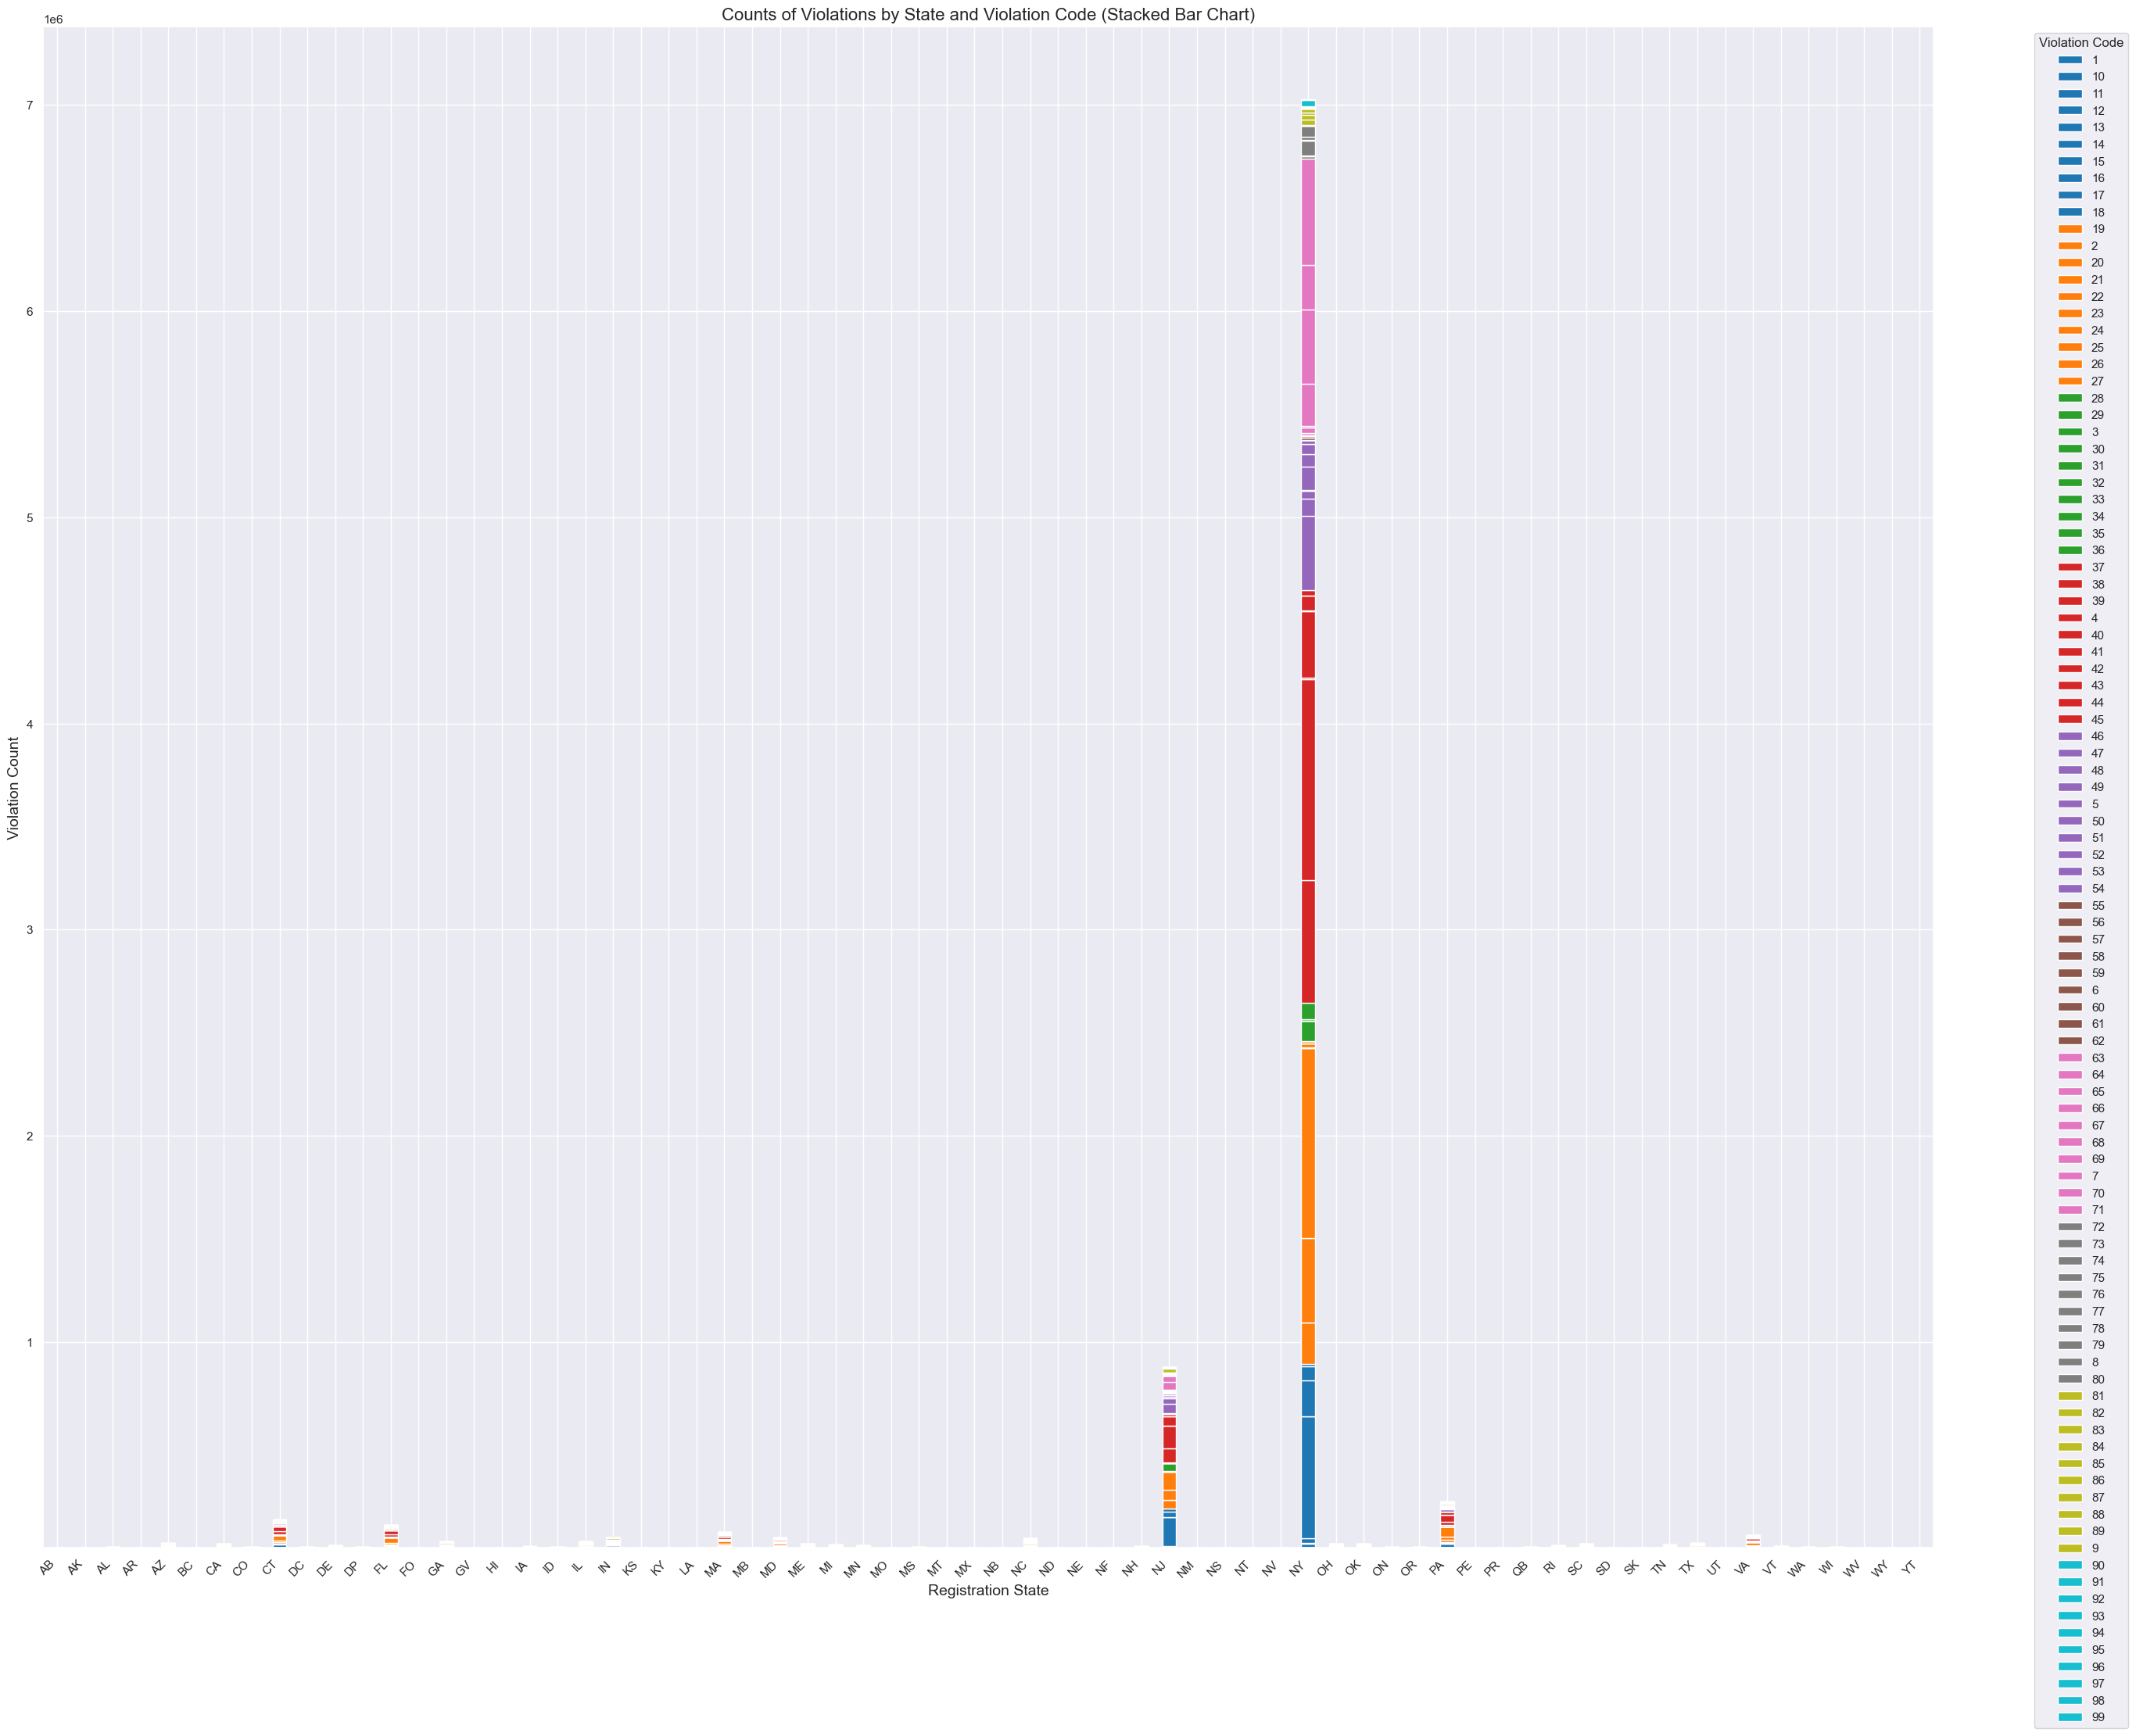

In [92]:
# Pivot the data for a stacked bar chart
pivot_counts = violation_counts.pivot(index='Registration State', columns='Violation Code', values='Counts').fillna(0)

# Plotting
ax = pivot_counts.plot(kind='bar', stacked=True, figsize=(28, 24), colormap='tab10')

# Title and labels
plt.title('Counts of Violations by State and Violation Code (Stacked Bar Chart)', fontsize=16)
plt.xlabel('Registration State', fontsize=14)
plt.ylabel('Violation Count', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot area to the right
plt.legend(title='Violation Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping and provide space for the legend
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()

And the final, fourth attempt: Using a heatmap. I've included two versions, to show how the person processing the data can influence it's intended
message

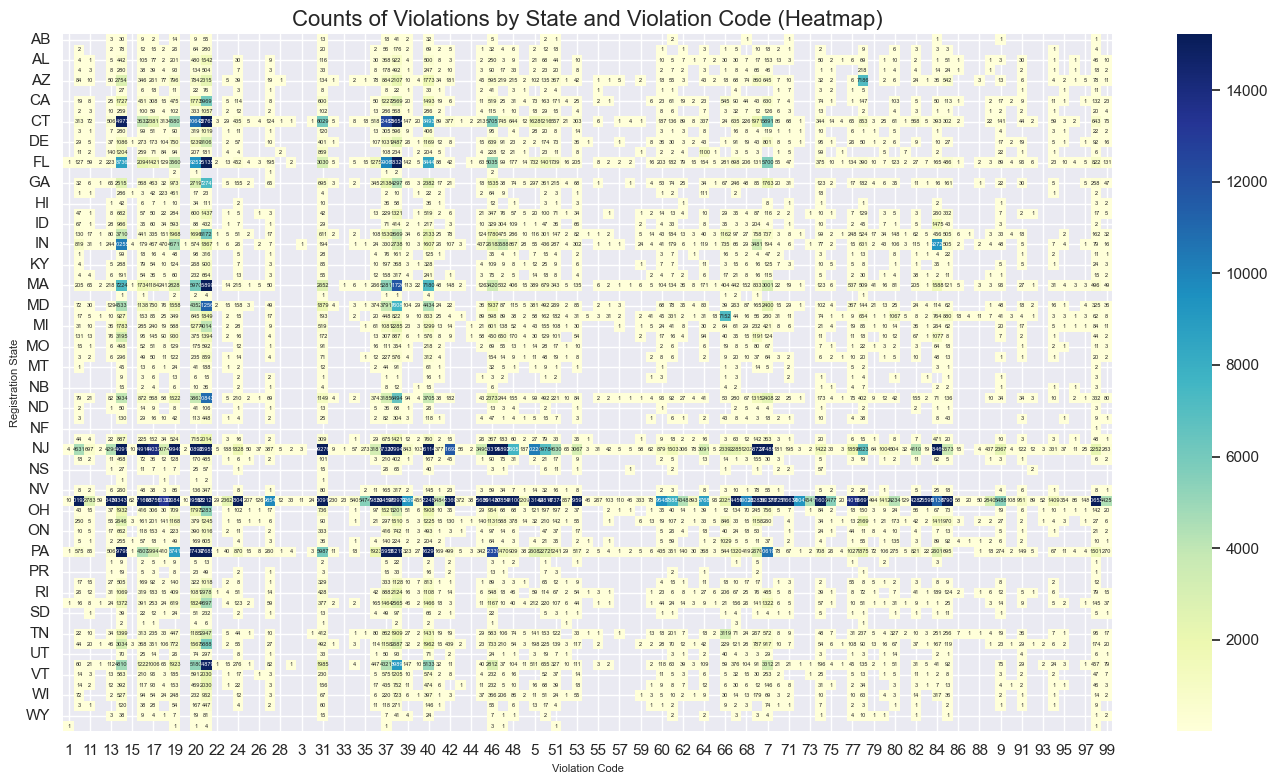

In [94]:
# Load and prepare your data (same as above)
violation_counts = df.groupby(['Registration State', 'Violation Code']).size().reset_index(name='Counts')
violation_counts['Violation Code'] = violation_counts['Violation Code'].astype(str)

# Pivot the data for a heatmap
heatmap_data = violation_counts.pivot(index='Registration State', columns='Violation Code', values='Counts')

# Find the min and max counts in the data
min_value = heatmap_data.min().min()
max_value = heatmap_data.max().max()

# Set custom min and max for the color scale, narrowing the range further
vmin = min_value
vmax = min_value + (max_value - min_value) / 64  # Adjust to a smaller range by dividing by 4

# Plotting with further adjusted color scale range
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', annot_kws={"size": 4}, vmin=vmin, vmax=vmax)
plt.title('Counts of Violations by State and Violation Code (Heatmap)', fontsize=16)
plt.xlabel('Violation Code', fontsize=8)
plt.ylabel('Registration State', fontsize=8)
plt.tight_layout()
plt.show()

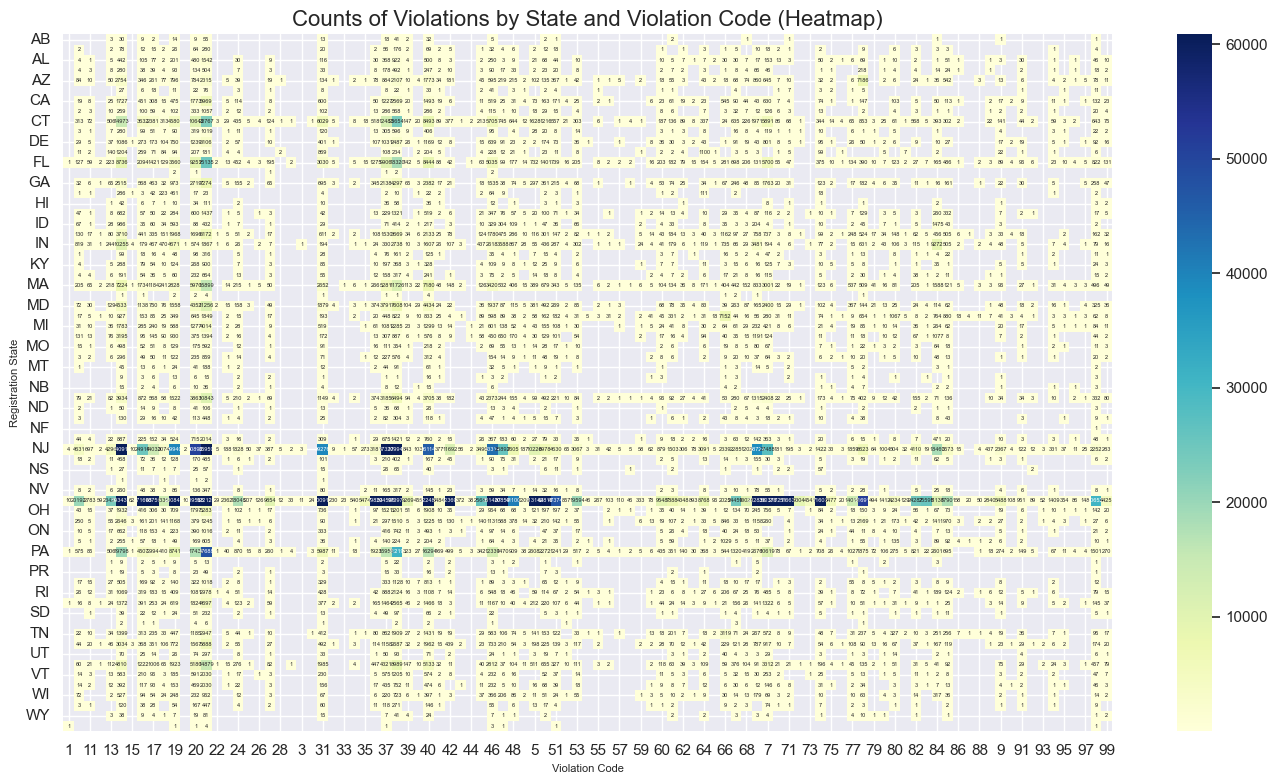

In [95]:
# Load and prepare your data (same as above)
violation_counts = df.groupby(['Registration State', 'Violation Code']).size().reset_index(name='Counts')
violation_counts['Violation Code'] = violation_counts['Violation Code'].astype(str)

# Pivot the data for a heatmap
heatmap_data = violation_counts.pivot(index='Registration State', columns='Violation Code', values='Counts')

# Find the min and max counts in the data
min_value = heatmap_data.min().min()
max_value = heatmap_data.max().max()

# Set custom min and max for the color scale, narrowing the range further
vmin = min_value
vmax = min_value + (max_value - min_value) / 16  # Adjust to a smaller range by dividing by 4

# Plotting with further adjusted color scale range
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', annot_kws={"size": 4}, vmin=vmin, vmax=vmax)
plt.title('Counts of Violations by State and Violation Code (Heatmap)', fontsize=16)
plt.xlabel('Violation Code', fontsize=8)
plt.ylabel('Registration State', fontsize=8)
plt.tight_layout()
plt.show()

This was my first attempt

In [97]:
df = pd.read_csv('Datasets/parking_violations_issued.csv', sep=',', index_col=0, low_memory=False)
df.keys()

Index(['Plate ID', 'Registration State', 'Plate Type', 'Issue Date',
       'Violation Code', 'Vehicle Body Type', 'Vehicle Make', 'Issuing Agency',
       'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'Number', 'Street',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [98]:
df = df.drop(['Plate ID','Street Code1','Plate Type','Street Code2','Street Code3','Vehicle Expiration Date','Violation Location','Violation Precinct','Issuer Code','Issuer Command','Violation In Front Of Or Opposite','Number','Street','Intersecting Street','Date First Observed','Law Section','Sub Division','Violation Legal Code','Days Parking In Effect    ','From Hours In Effect','To Hours In Effect','Meter Number','Feet From Curb','Violation Post Code','Violation Description'],axis=1)

In [99]:
df.keys()

Index(['Registration State', 'Issue Date', 'Violation Code',
       'Vehicle Body Type', 'Vehicle Make', 'Issuing Agency',
       'Issuer Precinct', 'Issuer Squad', 'Violation Time',
       'Time First Observed', 'Violation County', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

# 

In [101]:
df.head

<bound method NDFrame.head of                Registration State  Issue Date  Violation Code  \
Summons Number                                                  
1361929741                     NY  12/18/1970              20   
1366962000                     NY  02/02/1971              46   
1342296187                     NY  09/18/1971              21   
1342296199                     TX  09/18/1971              21   
1342296217                     NY  09/18/1971              21   
...                           ...         ...             ...   
1369104972                     NY  06/26/2066              46   
1361802455                     NY  11/03/2066              46   
1365797922                     NY  01/30/2067              40   
1367760884                     CT  04/15/2067              40   
1356701073                     NY  12/23/2069              40   

               Vehicle Body Type Vehicle Make  ... Unregistered Vehicle?  \
Summons Number                                 .

In [102]:
# Strip any extra spaces from 'Registration State' to avoid mismatches
df['Registration State'] = df['Registration State'].str.strip()

# Optionally, check if there are any missing values in important columns
print(df[['Registration State', 'Violation Code']].isnull().sum())

Registration State    0
Violation Code        0
dtype: int64


In [103]:
df['Violation Code'] = pd.to_numeric(df['Violation Code'], errors='coerce')  # 'coerce' will convert invalid values to NaN

In [104]:
# Check for any NaN values in 'Violation Code' after conversion
print(df['Violation Code'].isnull().sum())

0


In [105]:
df_cleaned = df[df['Registration State'] != '99']

In [106]:
print(df_cleaned['Registration State'].unique())

['NY' 'TX' 'VA' 'NJ' 'ME' 'SC' 'CT' 'IL' 'MA' 'PA' 'FL' 'GV' 'TN' 'NC'
 'AZ' 'IN' 'MD' 'DE' 'VT' 'ID' 'KS' 'OH' 'GA' 'CA' 'WA' 'NH' 'RI' 'LA'
 'NM' 'AL' 'OK' 'CO' 'DC' 'AR' 'MI' 'MS' 'ON' 'MN' 'WI' 'WV' 'OR' 'ND'
 'DP' 'SD' 'IA' 'MO' 'NS' 'NE' 'KY' 'UT' 'QB' 'NV' 'MT' 'AK' 'WY' 'HI'
 'MX' 'SK' 'BC' 'AB' 'PR' 'PE' 'NB' 'MB' 'FO' 'NT' 'YT' 'NF']


In [107]:
df = df_cleaned

# Check if there are any missing values in 'Violation Code'
print(df['Violation Code'].isnull().sum())

# Check the unique values in 'Violation Code' to identify any odd values
print(df['Violation Code'].unique())

0
[20 46 21 40 14 59 31 66 78 98 99 71 70 67 19 45 51 74 49 16 47 50 60 10
 62 68 17 27 18 94 77 88 80 38 41 48 24 37  5 34 53 75 83 85 90 96  9 15
 29 95 91 52 84 42 79 61 22 86 89 64 73 82 39  8 55 11 43 65  7 63  6 93
 81 26 72 76 13 58 57 23 56  4 69  3  1 97 92 54 30 12 25 35 36 32 87 33
 28  2 44  0]


In [108]:
# Filter out rows where 'Violation Code' is 0 or any other invalid values
df_cleaned = df_cleaned[df_cleaned['Violation Code'] != 0]

In [109]:
df = df_cleaned

# Group by 'Registration State' and 'Violation Code' again after cleaning
violation_counts = df_cleaned.groupby(['Registration State', 'Violation Code']).size().reset_index(name='Counts')

# Check the result
print(violation_counts.head())

  Registration State  Violation Code  Counts
0                 AB               9       1
1                 AB              13       3
2                 AB              14      30
3                 AB              16       9
4                 AB              17       2


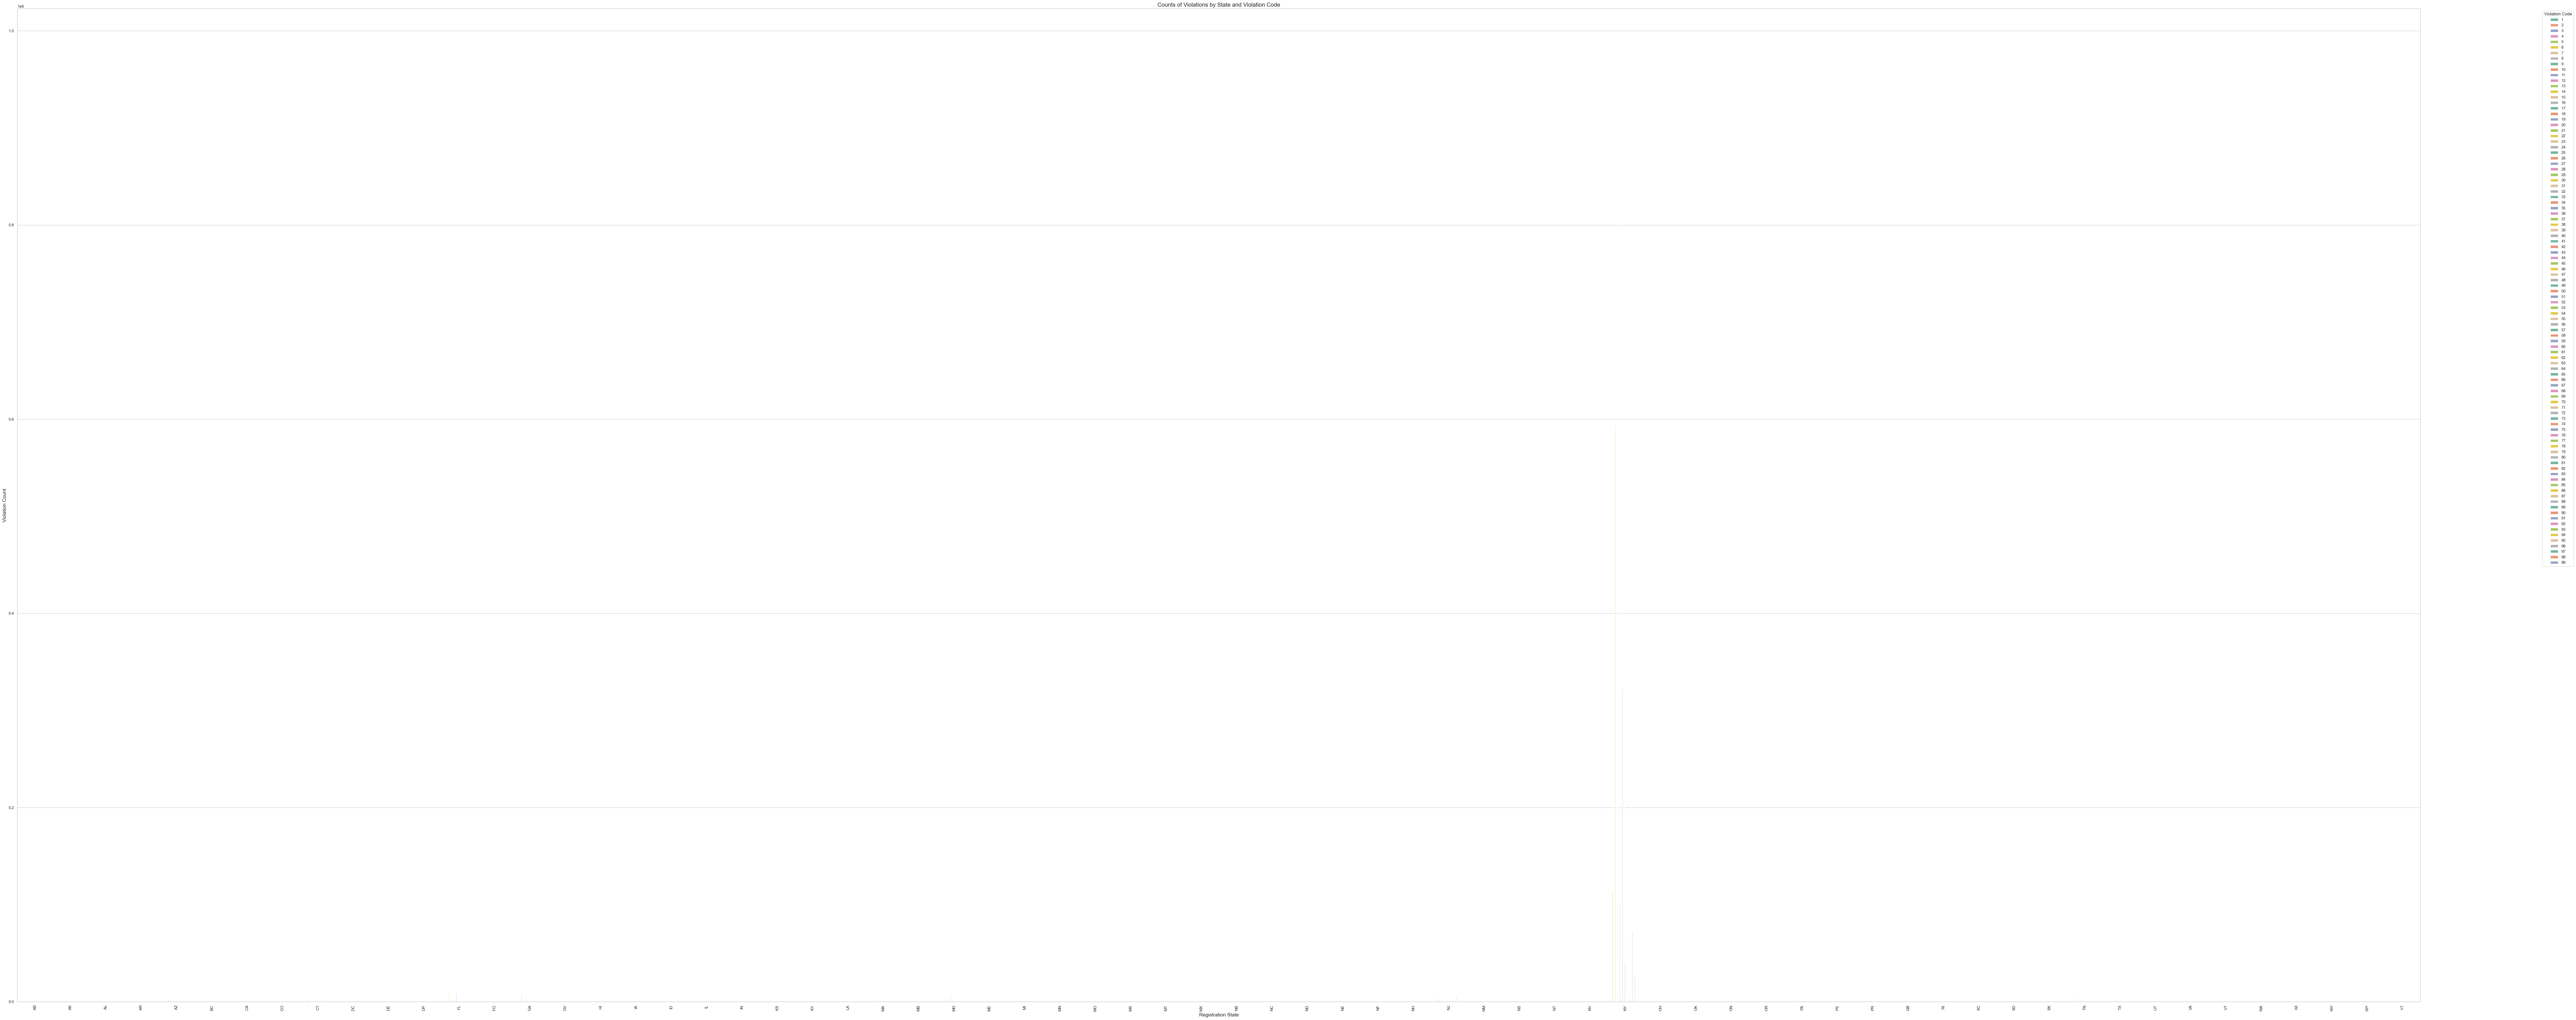

In [110]:
# Set the plot style
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(100, 40))
sns.barplot(x='Registration State', y='Counts', hue='Violation Code', data=violation_counts, palette='Set2')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and a title
plt.title('Counts of Violations by State and Violation Code', fontsize=16)
plt.xlabel('Registration State', fontsize=14)
plt.ylabel('Violation Count', fontsize=14)

# Show the legend and the plot
plt.legend(title='Violation Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [111]:
total_entries = len(df)

# Count the number of entries where the 'Registration State' is 'NY' (New York)
ny_entries = df[df['Registration State'] == 'NY'].shape[0]

# Calculate the percentage of entries from New York
ny_percentage = (ny_entries / total_entries) * 100

In [112]:
print(total_entries)
print(ny_percentage)

9062175
77.57283433612791


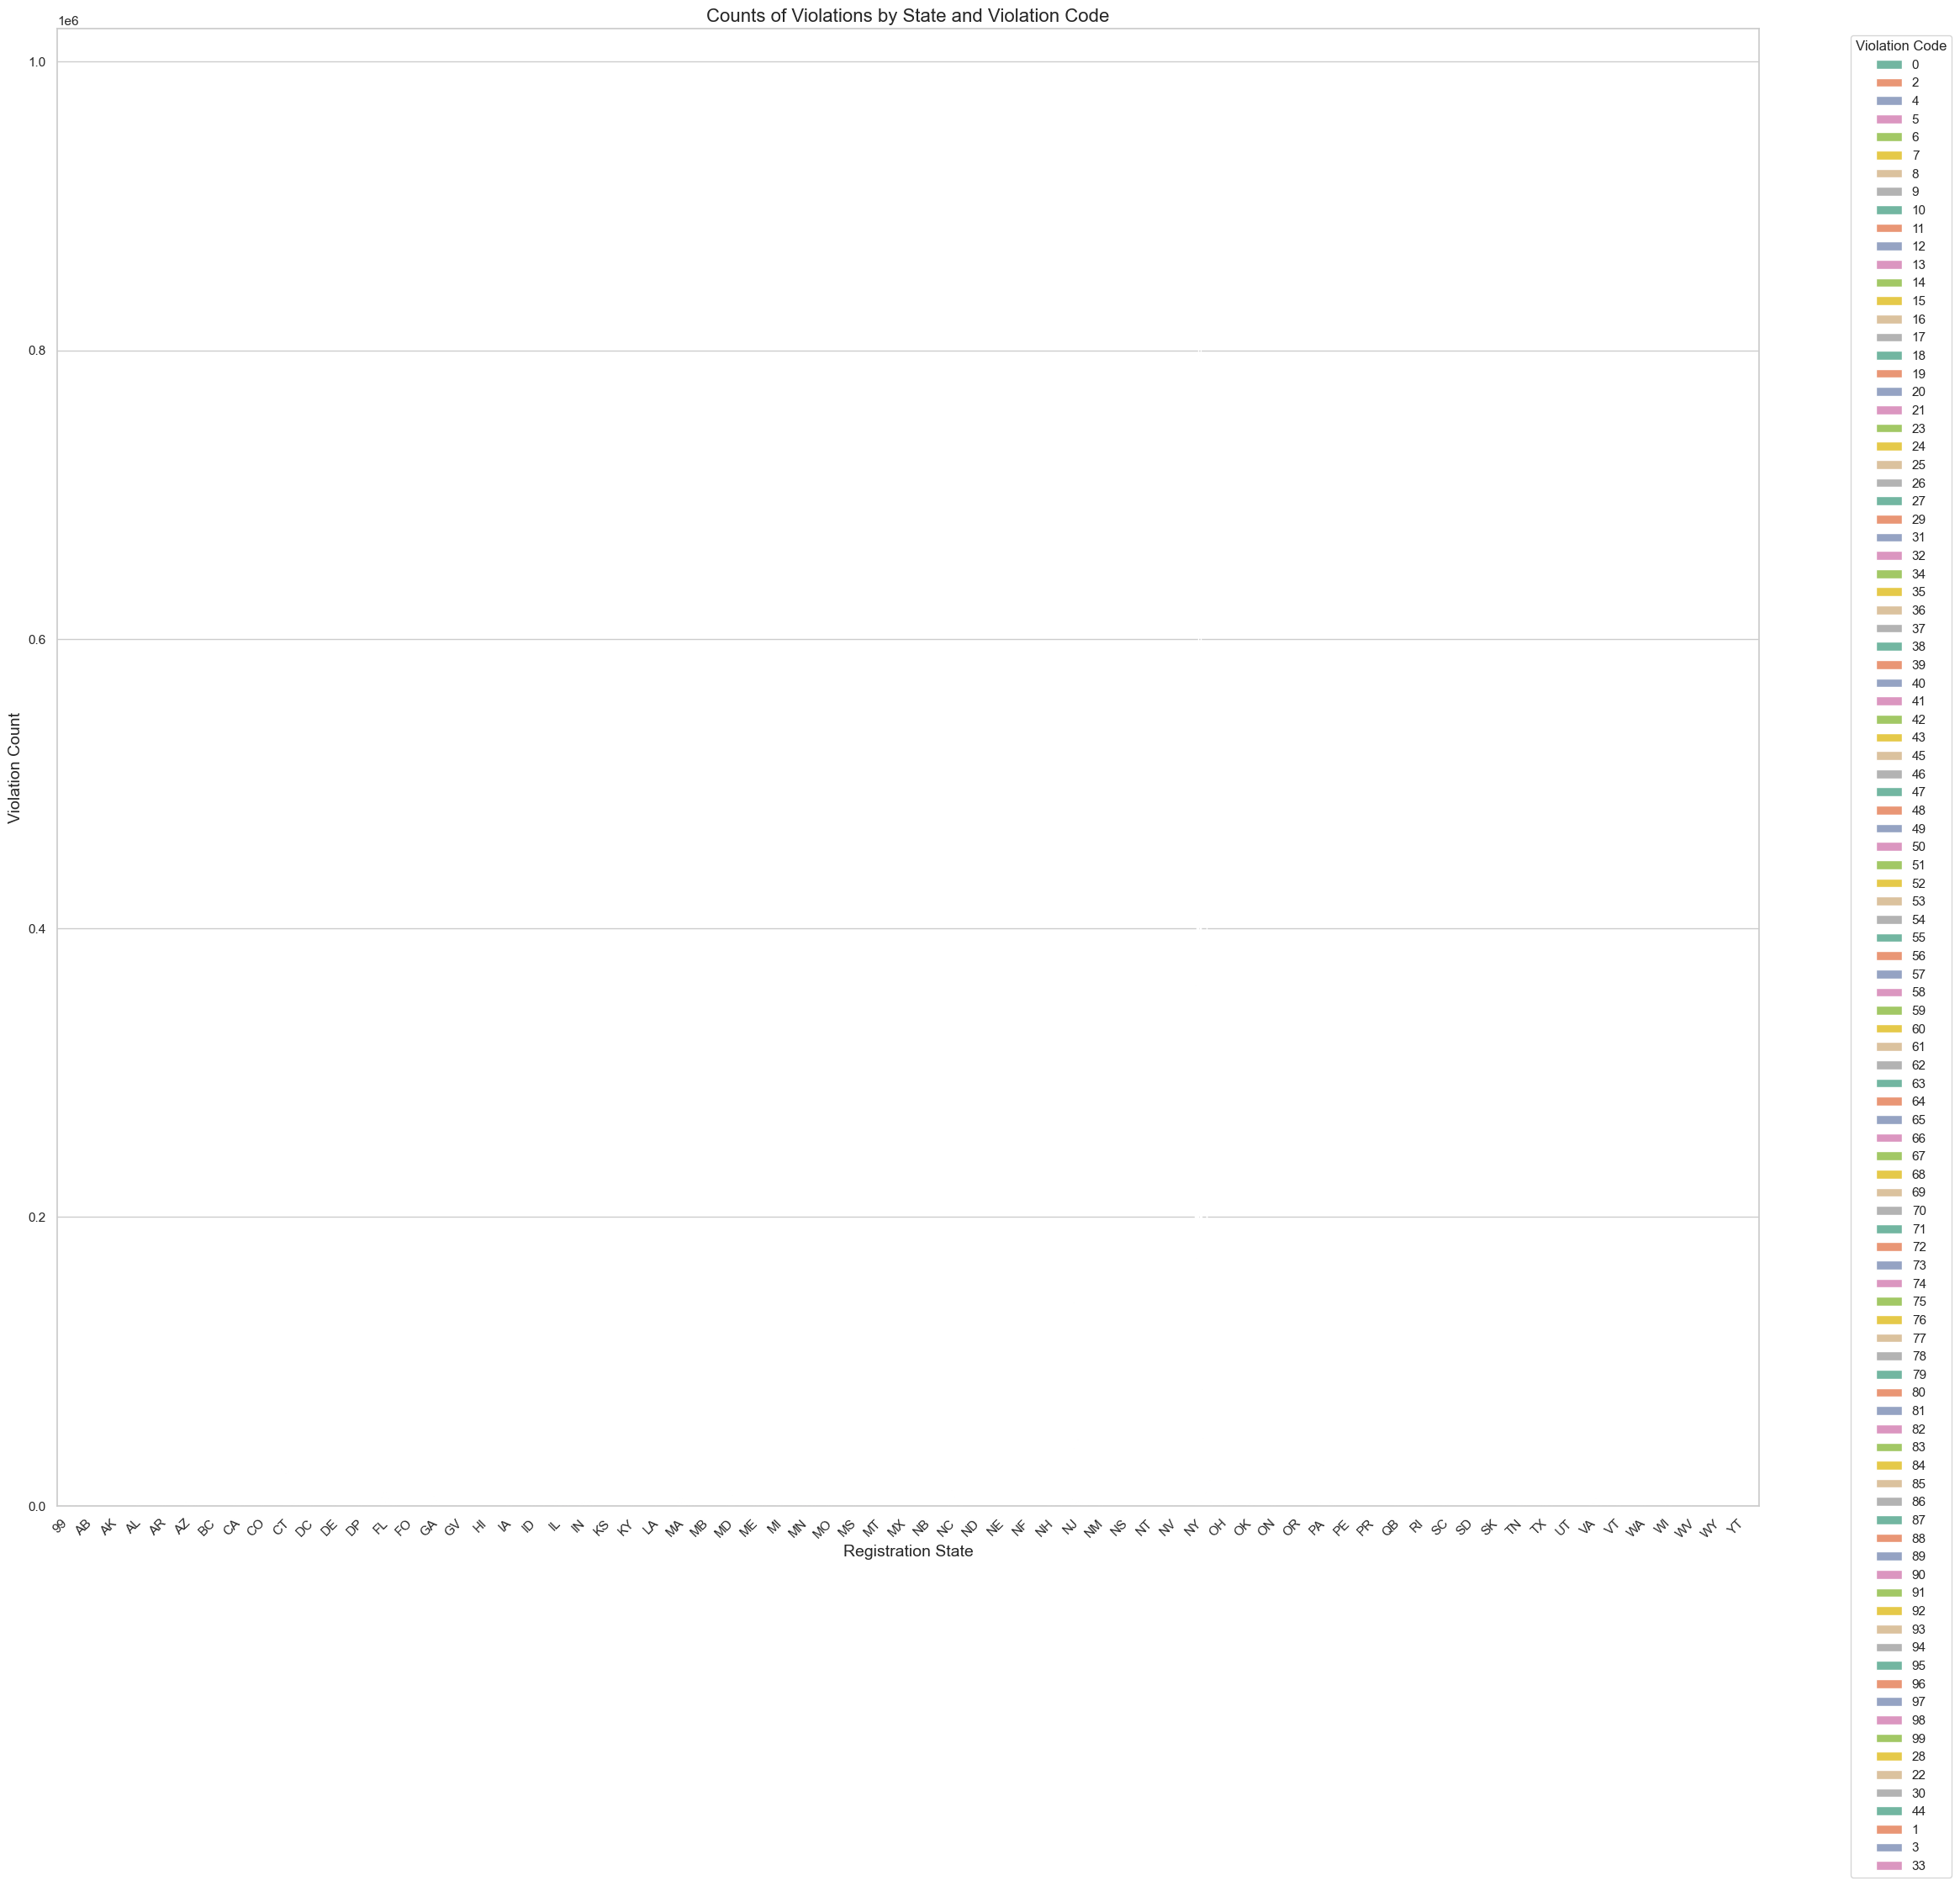

In [113]:
# Load your data with the new file path
df = pd.read_csv('C:/Users/brook/Python-Module/Datasets/Parking_Violations_Issued.csv', sep=',', index_col=0, low_memory=False)

# Clean up data: Convert 'Registration State' to string and strip extra spaces
df['Registration State'] = df['Registration State'].str.strip()

# Convert 'Violation Code' to numeric, and handle any errors as NaN (then drop NaNs)
df['Violation Code'] = pd.to_numeric(df['Violation Code'], errors='coerce')
df = df.dropna(subset=['Violation Code'])  # Drop rows with NaN values in 'Violation Code'

# Group the data by 'Registration State' and 'Violation Code' and count occurrences
violation_counts = df.groupby(['Registration State', 'Violation Code']).size().reset_index(name='Counts')

# Filter out states with zero violations (if any exist, though this should already be clean)
violation_counts = violation_counts[violation_counts['Counts'] > 0]

# Ensure that 'Violation Code' is treated as a categorical variable (string type)
violation_counts['Violation Code'] = violation_counts['Violation Code'].astype(str)

# Increase the figure size to provide more space for the plot
plt.figure(figsize=(24, 24))

# Create a custom color palette for the violation codes
violation_codes = violation_counts['Violation Code'].unique()  # Get unique violation codes
palette = sns.color_palette("Set2", len(violation_codes))  # Create palette based on the unique codes

# Create the barplot with 'Registration State' on the x-axis and 'Counts' on the y-axis, color-coded by 'Violation Code'
sns.barplot(x='Registration State', y='Counts', hue='Violation Code', data=violation_counts,
            palette=palette, hue_order=violation_codes)  # Ensure correct color mapping

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and a title
plt.title('Counts of Violations by State and Violation Code', fontsize=16)
plt.xlabel('Registration State', fontsize=14)
plt.ylabel('Violation Count', fontsize=14)

# Move the legend outside the plot area to the right
plt.legend(title='Violation Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Manually adjust margins based on the scale of counts and to prevent clipping
plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.2)

# Automatically adjust the padding between plot elements (if necessary)
plt.tight_layout(pad=3.0)  # Adjust layout to prevent clipping

# Show the plot
plt.show()